<a href="https://colab.research.google.com/github/yunha91/analysis/blob/master/%EB%B3%B4%EC%8A%A4%ED%84%B4%EC%A7%91%EA%B0%92%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/BostonHousing2.csv")

In [ ]:
df.head()

,TOWN,LON,LAT,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,Nahant,-70.955,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,Swampscott,-70.950,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,Swampscott,-70.936,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,Marblehead,-70.928,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,Marblehead,-70.922,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


* 기본정보탐색 

In [ ]:
df.shape

(506, 17)

In [ ]:
df.isnull().sum()

TOWN       0
LON        0
LAT        0
CMEDV      0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TOWN     506 non-null    object 
 1   LON      506 non-null    float64
 2   LAT      506 non-null    float64
 3   CMEDV    506 non-null    float64
 4   CRIM     506 non-null    float64
 5   ZN       506 non-null    float64
 6   INDUS    506 non-null    float64
 7   CHAS     506 non-null    int64  
 8   NOX      506 non-null    float64
 9   RM       506 non-null    float64
 10  AGE      506 non-null    float64
 11  DIS      506 non-null    float64
 12  RAD      506 non-null    int64  
 13  TAX      506 non-null    int64  
 14  PTRATIO  506 non-null    float64
 15  B        506 non-null    float64
 16  LSTAT    506 non-null    float64
dtypes: float64(13), int64(3), object(1)
memory usage: 67.3+ KB


In [ ]:
df['CMEDV'].describe()

count    506.000000
mean      22.528854
std        9.182176
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: CMEDV, dtype: float64

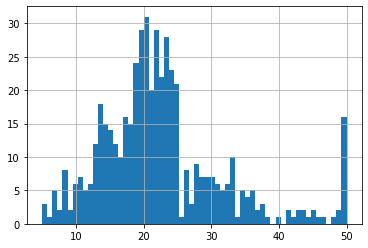

In [ ]:
df['CMEDV'].hist(bins=60)

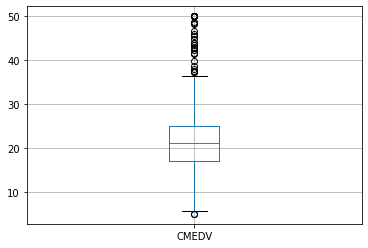

In [ ]:
df.boxplot(column=['CMEDV'])

* 설명 변수들의 분포 탐색 

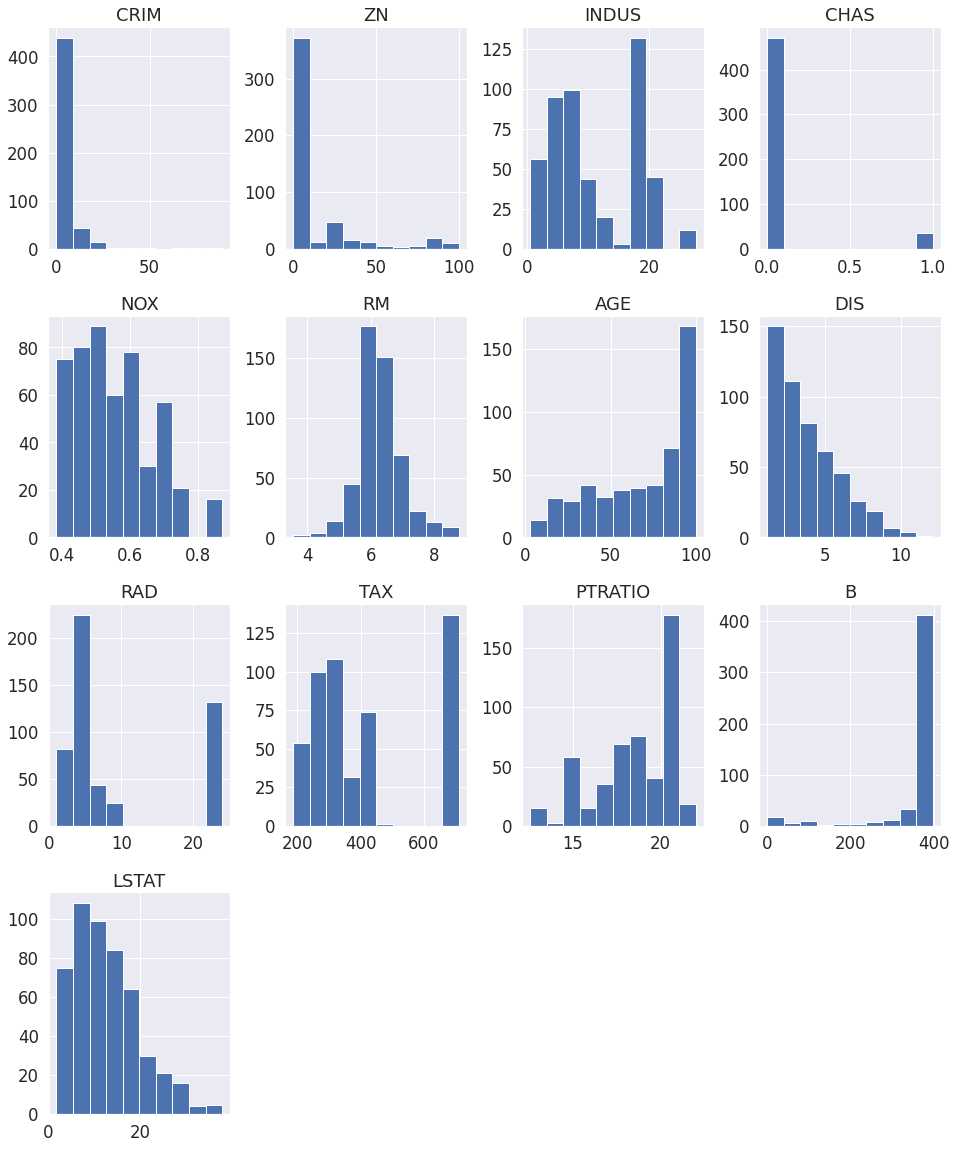

In [ ]:
numerical_columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
fig = plt.figure(figsize=(16,20))

ax=fig.gca()
df[numerical_columns].hist(ax=ax)
plt.show()

In [ ]:
cols = ['CMEDV','CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
corr=df[cols].corr(method='pearson')

In [ ]:
corr

,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CMEDV,1.000000,-0.389582,0.360386,-0.484754,0.175663,-0.429300,0.696304,-0.377999,0.249315,-0.384766,-0.471979,-0.505655,0.334861,-0.740836
CRIM,-0.389582,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,0.360386,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,-0.484754,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,0.175663,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,-0.429300,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,0.696304,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,-0.377999,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,0.249315,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,-0.384766,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676


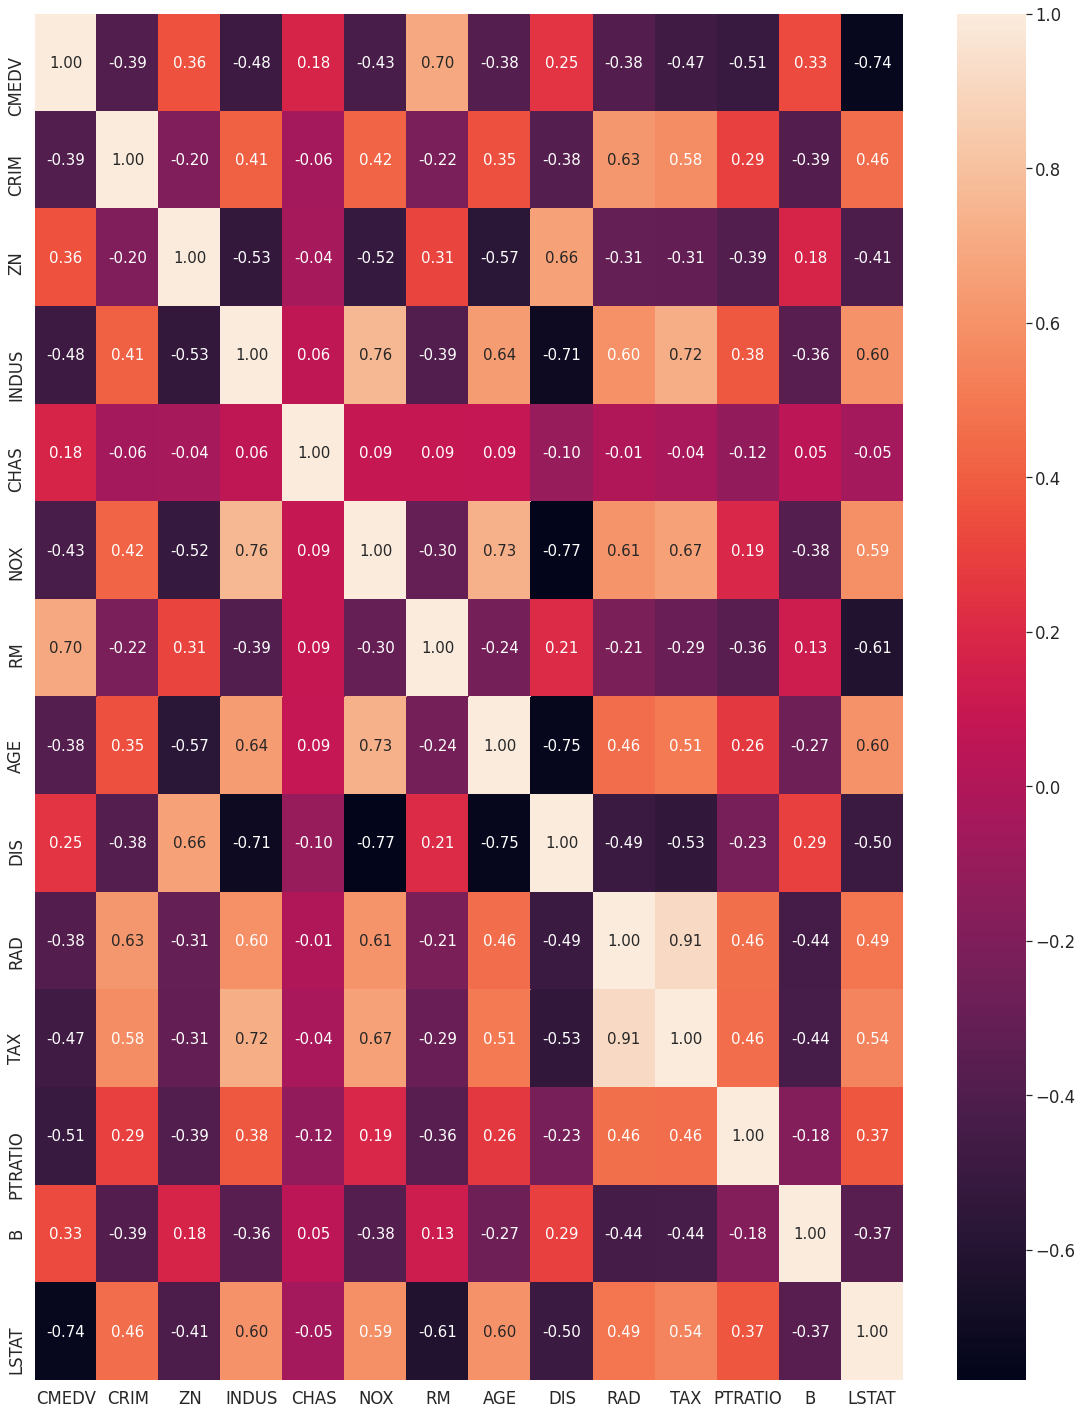

In [ ]:
fig=plt.figure(figsize=(16,20))
ax=fig.gca()
sns.set(font_scale=1.5)
hm=sns.heatmap(corr.values, annot=True, fmt='.2f', annot_kws={'size':15}, yticklabels=cols, xticklabels=cols, ax=ax)
plt.tight_layout()
plt.show()

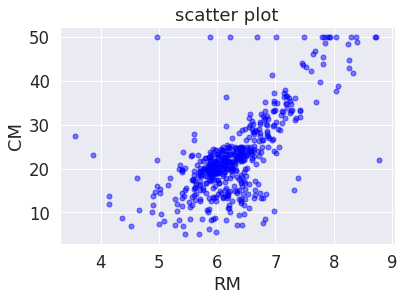

In [ ]:
plt.plot('RM','CMEDV', data=df, linestyle='none',marker='o', markersize=5, color='blue',alpha=0.5)
plt.title('scatter plot')
plt.xlabel('RM')
plt.ylabel('CM')
plt.show()

In [ ]:
df['TOWN'].value_counts()

Cambridge            30
Boston Savin Hill    23
Lynn                 22
Boston Roxbury       19
Newton               18
                     ..
Medfield              1
Hamilton              1
Lincoln               1
Wenham                1
Norfolk               1
Name: TOWN, Length: 92, dtype: int64

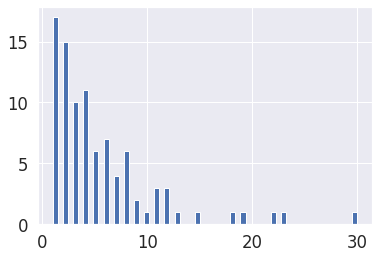

In [ ]:
df['TOWN'].value_counts().hist(bins=60)

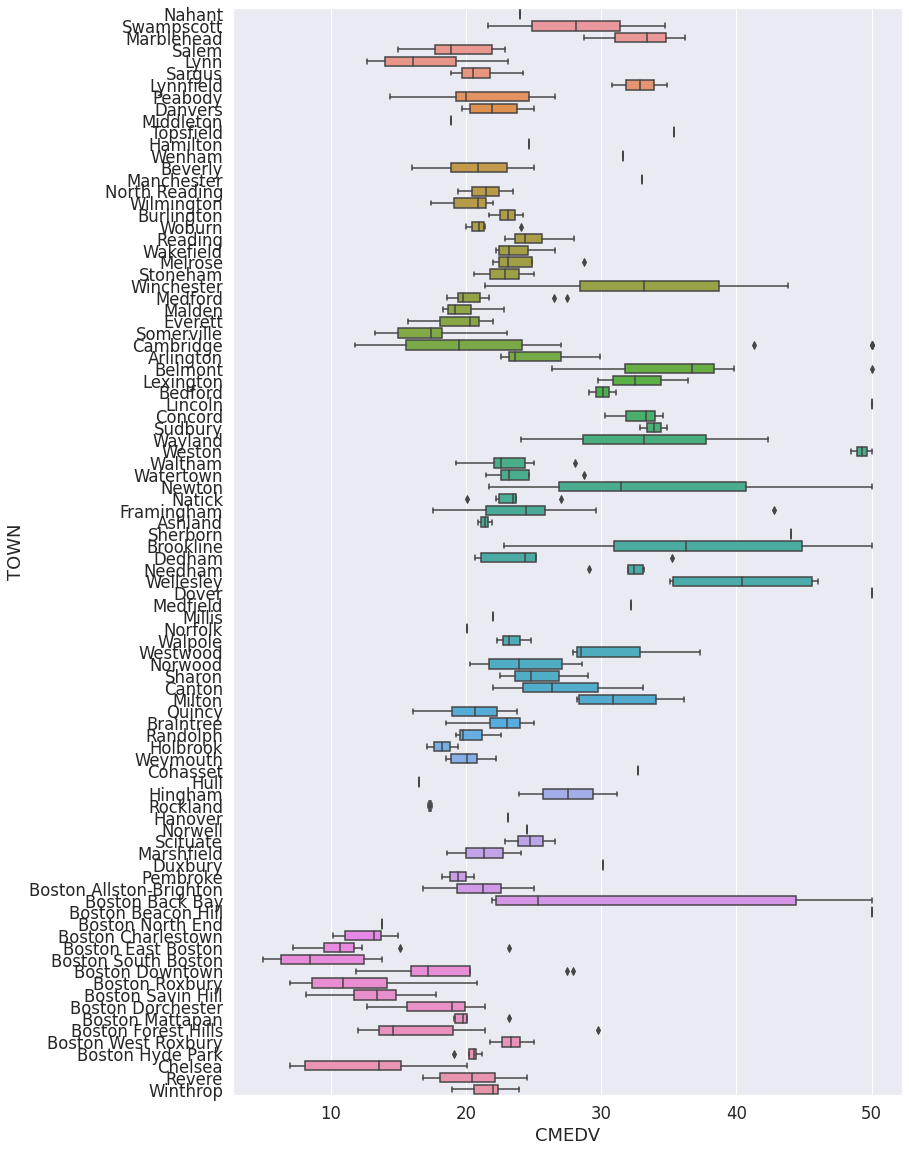

In [ ]:


fig=plt.figure(figsize=(12,20))
ax=fig.gca()
sns.boxplot(x='CMEDV', y='TOWN', data=df, ax=ax)


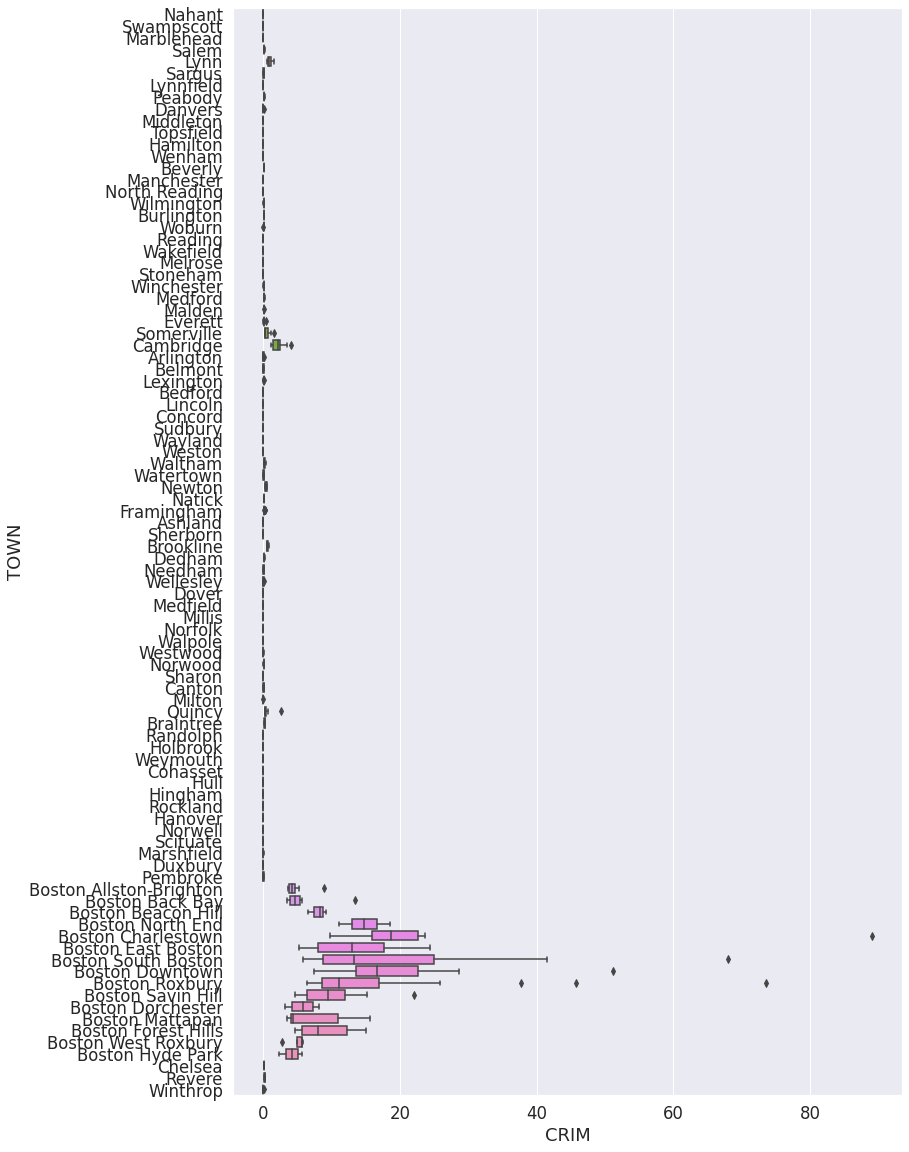

In [ ]:
fig=plt.figure(figsize=(12,20))
ax=fig.gca()
sns.boxplot(x='CRIM', y='TOWN', data=df, ax=ax)

* 회귀분석 

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler_columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']

In [ ]:
df[scaler_columns]= scaler.fit_transform(df[scaler_columns])

In [ ]:
df.head()

,TOWN,LON,LAT,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,Nahant,-70.955,42.2550,24.0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,Swampscott,-70.950,42.2875,21.6,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,Swampscott,-70.936,42.2830,34.7,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,Marblehead,-70.928,42.2930,33.4,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,Marblehead,-70.922,42.2980,36.2,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


* 데이터셋 분리 

In [ ]:
from sklearn.model_selection import train_test_split
x=df[scaler_columns]
y=df['CMEDV']
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=33)

In [ ]:
x_train.shape, x_valid.shape

((404, 13), (102, 13))

In [ ]:
y_train.shape, y_valid.shape

((404,), (102,))

* 회귀분석 모델 학습 

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
lr = linear_model.LinearRegression()
model = lr.fit(x_train, y_train)

In [ ]:
plt.rcParams['figure.figsize']=[12,16]
coefs=lr.coef_.tolist()
coefs_series=pd.Series(coefs)

AttributeError: ignored

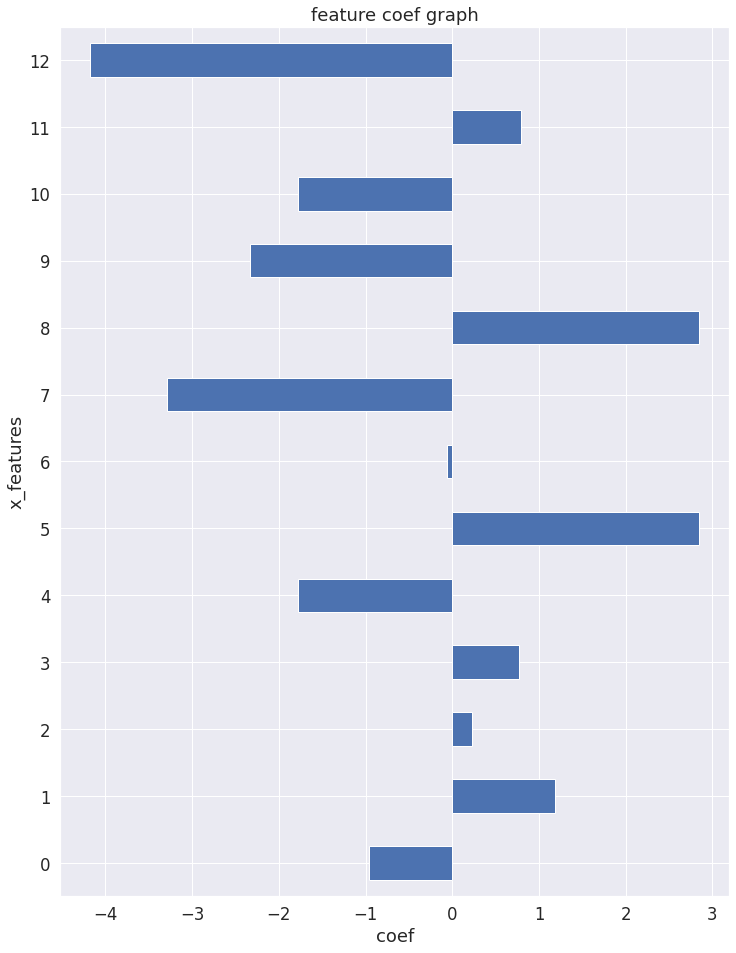

In [ ]:
x_labels=scaler_columns
ax=coefs_series.plot.barh()
ax.set_title('feature coef graph')
ax.set_xlabel('coef')
ax.set_ylabel('x_features')
ax.set_ytickslabels(x_labels)
plt.show()

In [ ]:
# R2 score 계산 

print(model.score(x_train, y_train))

0.7490284664199387


In [ ]:
print(model.score(x_valid, y_valid))

0.700934213532155


In [ ]:
#RMSE score 계산 (값의 제곱이므로 sqrt사용)

y_predictions = lr.predict(x_train)
print(sqrt(mean_squared_error(y_train, y_predictions)))


y_predictions = lr.predict(x_valid)
print(sqrt(mean_squared_error(y_valid, y_predictions)))

4.672162734008587
4.61495178491331


* 피쳐들의 유의성 검정 

In [ ]:
# statsmodels.api가 summary를 제공해줌 


import statsmodels.api as sm

x_train=sm.add_constant(x_train)
model=sm.OLS(y_train, x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  CMEDV   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     89.54
Date:                Sun, 04 Oct 2020   Prob (F-statistic):          2.61e-108
Time:                        09:57:29   Log-Likelihood:                -1196.1
No. Observations:                 404   AIC:                             2420.
Df Residuals:                     390   BIC:                             2476.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.4800      0.238     94.635      0.000      22.013      22.947
CRIM          -0.9555      0.299     -3.192      0.002      -1.544      -0.367
ZN             1.1869      0.353      3.362      0.001       0.493       1.881
INDUS          0.2230      0.470      0.475      0.635      -0.700       1.147
CHAS           0.7666      0.238      3.227      0.001       0.300       1.234
NOX           -1.7840      0.512     -3.482      0.001      -2.791      -0.777
RM             2.8399      0.326      8.723      0.000       2.200       3.480
AGE           -0.0556      0.410     -0.135      0.892      -0.862       0.751
DIS           -3.2841      0.491     -6.695      0.000      -4.248      -2.320
RAD            2.8448      0.650      4.375      0.000       1.566       4.123
TAX           -2.3374      0.717     -3.259      0.001      -3.748      -0.927
PTRATIO       -1.7782      0.312     -5.700      0.000      -2.391      -1.165
B              0.7977      0.293      2.725      0.007       0.222       1.373
LSTAT         -4.1738      0.405    -10.317      0.000      -4.969      -3.378
==============================================================================
Omnibus:                      167.528   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              769.057
Skew:                           1.774   Prob(JB):                    1.00e-167
Kurtosis:                       8.753   Cond. No.                         9.63
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* 다중 공선성

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()

In [ ]:
vif['VIF Facotr'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]

In [ ]:
vif['feature']=x_train.columns
vif.round(1)

,VIF Facotr,feature
0,1.0,const
1,1.7,CRIM
2,2.2,ZN
3,3.9,INDUS
4,1.1,CHAS
5,4.4,NOX
6,1.9,RM
7,3.1,AGE
8,4.1,DIS
9,6.9,RAD
